# sklearn evaluator

sklearn 评估器api的常用步骤：
1. 通过从sklearn中导入适当得评估器类，选择模型类
2. 用合适的数值对模型类型进行实例化，配置模型超参数（hyperparameter）
3. 整理数据，通过前面介绍的方法获取特征矩阵和目标数组
4. 调用模型实例的`fit()`方法对数据进行拟合
5. 对新数据应用模型
    - 在有监督学习模型中，通常使用`predict()`方法预测新数据的标签
    - 在无监督学习模型中，通常使用`transform()`或`predict()`方法转换或推断数据的性质

# 有监督学习示例：简单线性回归

## 样本数据

In [15]:
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

In [16]:
rng

RandomState(MT19937) at 0x115025160

In [17]:
x

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456])

In [18]:
y

array([ 7.22926896, 18.18565441, 13.52423055, 10.67206599,  0.64185082,
        1.4000462 , -0.29896653, 17.38064514, 11.36591852, 11.3984114 ,
       -0.26422614, 18.01311476, 14.97193082,  3.8584585 ,  3.66749887,
        3.59937032,  4.24562734,  9.18591626,  7.9701638 ,  5.80012793,
       10.75788366,  1.60421824,  3.736558  ,  5.13103024,  8.93392551,
       16.05975926,  2.92146552, 10.28822167, 11.2099274 , -0.7161115 ,
       11.51229264,  3.94851904,  0.26520582, 19.5423544 , 15.69289556,
       15.98984947,  5.17932245,  0.65443493, 12.77642131,  5.81548096,
        1.22109281,  9.26065077,  1.16566447, 16.66813782,  3.36710603,
       11.74868864,  6.14962364,  9.73011153,  9.40444538,  3.21035654])

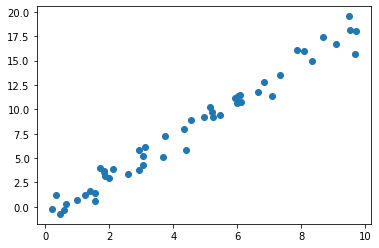

In [19]:
import matplotlib.pyplot as plt

plt.scatter(x, y);

### 1. 选择模型

In [21]:
from sklearn.linear_model import LinearRegression

### 2. 选择模型超参数

选择模型后，还有许多参数需要配置。根据不同模型，需要回答以下问题：
- 我们想要拟合偏移量（即直线的截距）吗？
- 我们需要对模型进行归一化处理吗？
- 我们需要对特征进行预处理以提高模型灵活性吗？
- 我们打算在模型中使用哪种正则化类型？
- 我们打算使用多少模型组件？

有些重要的参数必须在选择模型类时就确定好，这些参数通常被称为超参数，即在模型拟合数据之前必须被确定的参数。

In [27]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 3. 将数据整理成特征矩阵和目标数组

In [28]:
X = x[:, np.newaxis]
X.shape

(50, 1)

### 4. 用模型拟合数据

In [29]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

在sklearn中，所有通过`fit()`方法获得的模型参数都带一条下划线。例如，在线性回归模型中，模型参数如下所示：

In [30]:
model.coef_

array([1.9776566])

In [31]:
model.intercept_

-0.9033107255311164

这两个参数分别表示对样本数据拟合直线的斜率和截距。与前面样本数据的定义 $y=2*x-1$ 进行对比，拟合结果与样本非常接近。

### 5. 预测新数据的标签

In [40]:
xfit = np.linspace(-1, 11)

In [44]:
xfit.shape

(50,)

In [45]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

In [46]:
xfit.shape

(50,)

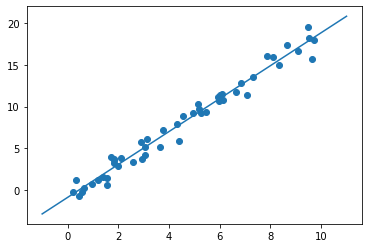

In [47]:
plt.scatter(x, y)
plt.plot(xfit, yfit);